In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv(r'C:\Users\Kashi\Downloads\Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [70]:
df['animal name'].nunique()

100

In [71]:
df.shape

(101, 18)

In [72]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [73]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<AxesSubplot:xlabel='type', ylabel='count'>

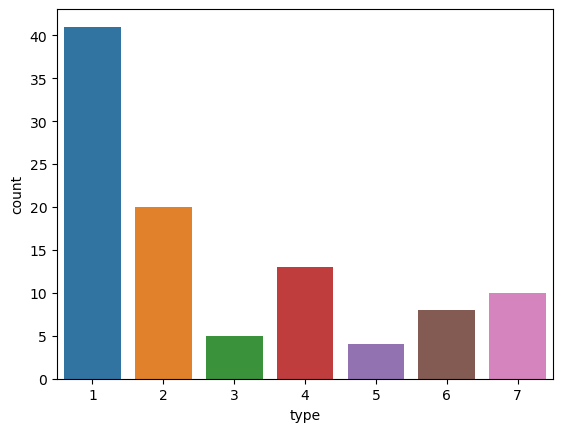

In [75]:
import seaborn as sns
sns.countplot(df['type'])

<AxesSubplot:xlabel='legs', ylabel='count'>

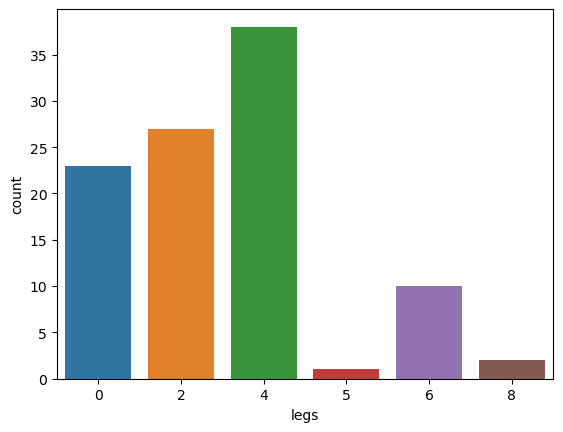

In [76]:
sns.countplot(df['legs'])

<AxesSubplot:xlabel='legs'>

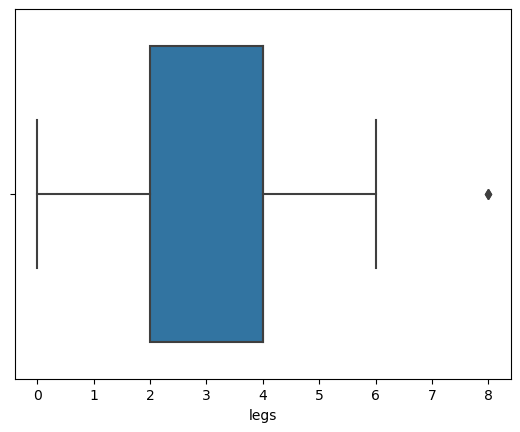

In [77]:
sns.boxplot(df['legs'])

In [78]:
x = df.iloc[:,1:17]
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [79]:
y = df['type']


In [80]:
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.         0.21449135 0.         0.38586367 0.07243882 0.03708868
 0.01738532 0.         0.07919978 0.         0.         0.14659203
 0.04694036 0.         0.         0.        ]


In [81]:
#creating datafeame 
d = {'f': x.columns, "v":model.feature_importances_}
imp = pd.DataFrame(d)
imp.sort_values('v', ascending=False, inplace = True)
imp

,f,v
3,milk,0.385864
1,feathers,0.214491
11,fins,0.146592
8,backbone,0.079200
4,airborne,0.072439
12,legs,0.046940
5,aquatic,0.037089
6,predator,0.017385
0,hair,0.000000
2,eggs,0.000000


In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(x,y)

In [83]:
fit.n_features_

8

In [84]:
fit.ranking_

array([1, 1, 3, 1, 2, 4, 7, 1, 1, 1, 8, 1, 5, 1, 9, 6])

In [85]:
d = {'f': x.columns, "v":fit.ranking_}
imp = pd.DataFrame(d)
imp.sort_values('v', ascending=True, inplace = True)
imp

,f,v
0,hair,1
1,feathers,1
3,milk,1
7,toothed,1
8,backbone,1
9,breathes,1
11,fins,1
13,tail,1
4,airborne,2
2,eggs,3


In [92]:
column_indices = [1, 2, 4, 8,9, 10,12, 14]

x = df.iloc[:, column_indices]
x.head()

,hair,feathers,milk,toothed,backbone,breathes,fins,tail
0,1,0,1,1,1,1,0,0
1,1,0,1,1,1,1,0,1
2,0,0,0,1,1,0,1,1
3,1,0,1,1,1,1,0,0
4,1,0,1,1,1,1,0,1


In [93]:
y = df['type']

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [95]:
knn = KNeighborsClassifier(n_neighbors=3)

In [96]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
ypred = knn.predict(x_test)

In [98]:
accuracy = accuracy_score(y_test, ypred)


In [99]:
accuracy

0.9523809523809523

In [100]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {'n_neighbors': range(1, 21)}

In [102]:
grid= GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [103]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [104]:
print(grid.best_score_)
print(grid.best_params_)

0.9375
{'n_neighbors': 2}


In [105]:
ypred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [107]:
knn1 = KNeighborsClassifier(n_neighbors = 2)

In [108]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [109]:
ypred1 = knn1.predict(x_test)
ypred1

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [110]:
accuracy1 = accuracy_score(y_test, ypred1)
accuracy1

0.9523809523809523